In [1]:
# Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score


In [2]:
# Set dataset paths
dataset_path = r"C:\\Users\\Sai Adithya\\Desktop\\DL PROJECT\\dataset"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

In [3]:
# Parameters
img_size = (224, 224)
batch_size = 32
epochs = 30

# Data augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 7628 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


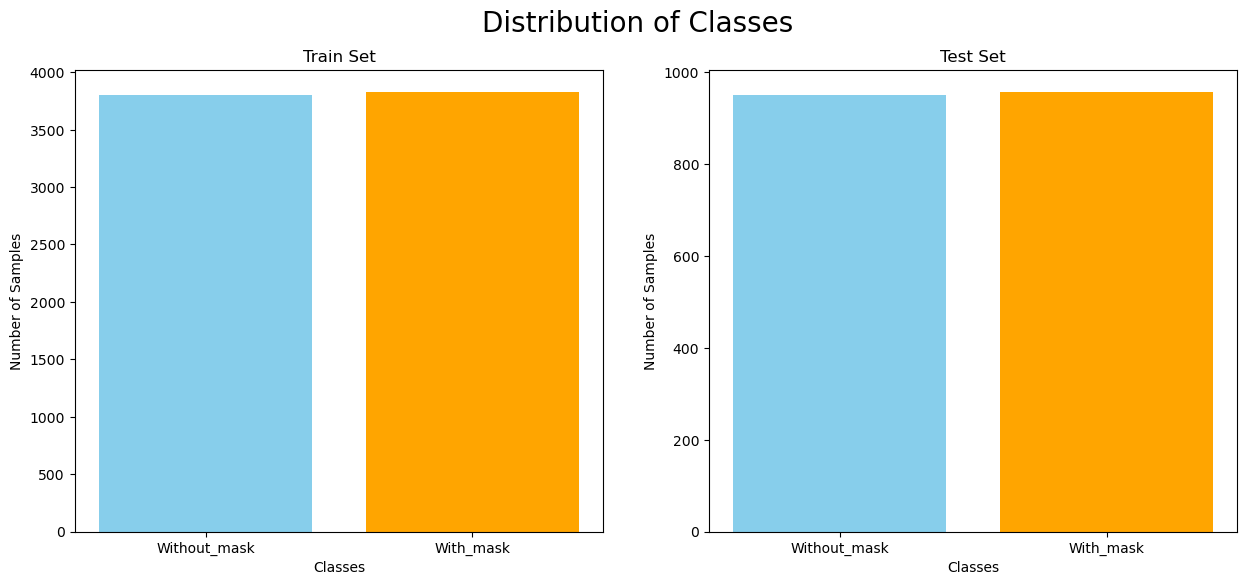

In [37]:
import os
import matplotlib.pyplot as plt


dataset_path = r"C:\Users\Sai Adithya\Desktop\DL PROJECT\dataset"


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, set_ in enumerate(["train", "test"]):
    set_path = os.path.join(dataset_path, set_)
    
    if not os.path.exists(set_path):  
        print(f"Warning: {set_path} does not exist.")
        continue
    
    counts = []
    labels = []
    
    for class_ in os.listdir(set_path):
        class_path = os.path.join(set_path, class_)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            counts.append(count)
            labels.append(class_.capitalize())
    

    axes[i].bar(labels, counts, color=['skyblue', 'orange'])
    axes[i].set_title(f"{set_.capitalize()} Set")
    axes[i].set_xlabel("Classes")
    axes[i].set_ylabel("Number of Samples")

plt.suptitle("Distribution of Classes", size=20)
plt.show()

In [5]:
# --- MobileNetV2-based model ---
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

mobilenet_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

mobilenet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mobilenet_checkpoint = ModelCheckpoint("mobilenet_mask_model.h5", monitor='val_accuracy', save_best_only=True)
mobilenet_early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\nTraining MobileNetV2 model...")
mobilenet_history = mobilenet_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[mobilenet_checkpoint, mobilenet_early_stop]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 15s 2us/step

Training MobileNetV2 model...


D:\Anacondaa\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7834 - loss: 0.5046

D:\Anacondaa\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


239/239 ━━━━━━━━━━━━━━━━━━━━ 601s 2s/step - accuracy: 0.7837 - loss: 0.5039 - val_accuracy: 0.9733 - val_loss: 0.0903
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9341 - loss: 0.1688

239/239 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.9341 - loss: 0.1688 - val_accuracy: 0.9759 - val_loss: 0.0680
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.9509 - loss: 0.1292 - val_accuracy: 0.9754 - val_loss: 0.0761
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.9575 - loss: 0.1100 - val_accuracy: 0.9754 - val_loss: 0.0659
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9617 - loss: 0.1135

239/239 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.9617 - loss: 0.1135 - val_accuracy: 0.9780 - val_loss: 0.0635
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9643 - loss: 0.1007

239/239 ━━━━━━━━━━━━━━━━━━━━ 462s 2s/step - accuracy: 0.9643 - loss: 0.1007 - val_accuracy: 0.9785 - val_loss: 0.0613
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 457s 2s/step - accuracy: 0.9653 - loss: 0.0948 - val_accuracy: 0.9785 - val_loss: 0.0609
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.9675 - loss: 0.0895 - val_accuracy: 0.9780 - val_loss: 0.0612
Epoch 9/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.9683 - loss: 0.0875 - val_accuracy: 0.9780 - val_loss: 0.0618
Epoch 10/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.9688 - loss: 0.0830 - val_accuracy: 0.9785 - val_loss: 0.0619
Epoch 11/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9715 - loss: 0.0763

239/239 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - accuracy: 0.9715 - loss: 0.0763 - val_accuracy: 0.9796 - val_loss: 0.0625
Epoch 12/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.9700 - loss: 0.0809 - val_accuracy: 0.9796 - val_loss: 0.0545
Epoch 13/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9721 - loss: 0.0726

239/239 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.9721 - loss: 0.0726 - val_accuracy: 0.9806 - val_loss: 0.0574
Epoch 14/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.9755 - loss: 0.0695 - val_accuracy: 0.9790 - val_loss: 0.0569
Epoch 15/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 451s 2s/step - accuracy: 0.9750 - loss: 0.0712 - val_accuracy: 0.9796 - val_loss: 0.0591
Epoch 16/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9751 - loss: 0.0673

239/239 ━━━━━━━━━━━━━━━━━━━━ 539s 2s/step - accuracy: 0.9751 - loss: 0.0673 - val_accuracy: 0.9811 - val_loss: 0.0539
Epoch 17/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.9699 - loss: 0.0807 - val_accuracy: 0.9801 - val_loss: 0.0553
Epoch 18/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9737 - loss: 0.0672

239/239 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.9737 - loss: 0.0672 - val_accuracy: 0.9817 - val_loss: 0.0530
Epoch 19/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.9770 - loss: 0.0577 - val_accuracy: 0.9811 - val_loss: 0.0564
Epoch 20/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9779 - loss: 0.0639

239/239 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.9779 - loss: 0.0639 - val_accuracy: 0.9832 - val_loss: 0.0504
Epoch 21/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.9766 - loss: 0.0693 - val_accuracy: 0.9769 - val_loss: 0.0641
Epoch 22/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.9761 - loss: 0.0644 - val_accuracy: 0.9817 - val_loss: 0.0568
Epoch 23/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.9764 - loss: 0.0635 - val_accuracy: 0.9822 - val_loss: 0.0529
Epoch 24/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.9743 - loss: 0.0786 - val_accuracy: 0.9806 - val_loss: 0.0575
Epoch 25/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.9762 - loss: 0.0659 - val_accuracy: 0.9822 - val_loss: 0.0540


In [29]:
print("\nMobileNetV2 Model Summary:")
mobilenet_model.summary()


MobileNetV2 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,750,664 (10.49 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,454 (1.25 MB)

In [6]:
# --- Custom CNN model ---
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_checkpoint = ModelCheckpoint("cnn_mask_model.h5", monitor='val_accuracy', save_best_only=True)
cnn_early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\nTraining Custom CNN model...")
cnn_history = cnn_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[cnn_checkpoint, cnn_early_stop]
)


D:\Anacondaa\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Custom CNN model...
Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8044 - loss: 0.4627

239/239 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.8047 - loss: 0.4622 - val_accuracy: 0.8962 - val_loss: 0.2450
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8927 - loss: 0.2675

239/239 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.8927 - loss: 0.2675 - val_accuracy: 0.9025 - val_loss: 0.2151
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9011 - loss: 0.2387

239/239 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - accuracy: 0.9011 - loss: 0.2387 - val_accuracy: 0.9057 - val_loss: 0.1998
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9075 - loss: 0.2099

239/239 ━━━━━━━━━━━━━━━━━━━━ 930s 4s/step - accuracy: 0.9075 - loss: 0.2100 - val_accuracy: 0.9167 - val_loss: 0.1855
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.9118 - loss: 0.2110 - val_accuracy: 0.9146 - val_loss: 0.1821
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 669s 3s/step - accuracy: 0.9210 - loss: 0.1947 - val_accuracy: 0.9146 - val_loss: 0.1886
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9224 - loss: 0.1902

239/239 ━━━━━━━━━━━━━━━━━━━━ 632s 3s/step - accuracy: 0.9224 - loss: 0.1902 - val_accuracy: 0.9355 - val_loss: 0.1562
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 624s 3s/step - accuracy: 0.9219 - loss: 0.1933 - val_accuracy: 0.9261 - val_loss: 0.1794
Epoch 9/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 660s 3s/step - accuracy: 0.9249 - loss: 0.1807 - val_accuracy: 0.9224 - val_loss: 0.1694
Epoch 10/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - accuracy: 0.9292 - loss: 0.1715 - val_accuracy: 0.9350 - val_loss: 0.1667
Epoch 11/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.9311 - loss: 0.1666 - val_accuracy: 0.9256 - val_loss: 0.1854
Epoch 12/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 563s 2s/step - accuracy: 0.9247 - loss: 0.1838 - val_accuracy: 0.9277 - val_loss: 0.1780


In [31]:
print("\nCustom CNN Model Summary:")
cnn_model.summary()



Custom CNN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,722,952 (273.60 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,815,302 (182.40 MB)

In [7]:
# --- Evaluation function ---
def evaluate_model(model, model_name):
    print(f"\nEvaluating {model_name}...")
    loss, accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {accuracy:.4f}")

    y_true = test_generator.classes
    y_pred_probs = model.predict(test_generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.colorbar()
    plt.show()



Evaluating MobileNetV2...
60/60 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9692 - loss: 0.0840
Test Accuracy: 0.9832
60/60 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step
F1 Score: 0.9832
Precision: 0.9832
Recall: 0.9832

Classification Report:
              precision    recall  f1-score   support

   with_mask       0.98      0.98      0.98       958
without_mask       0.98      0.98      0.98       950

    accuracy                           0.98      1908
   macro avg       0.98      0.98      0.98      1908
weighted avg       0.98      0.98      0.98      1908



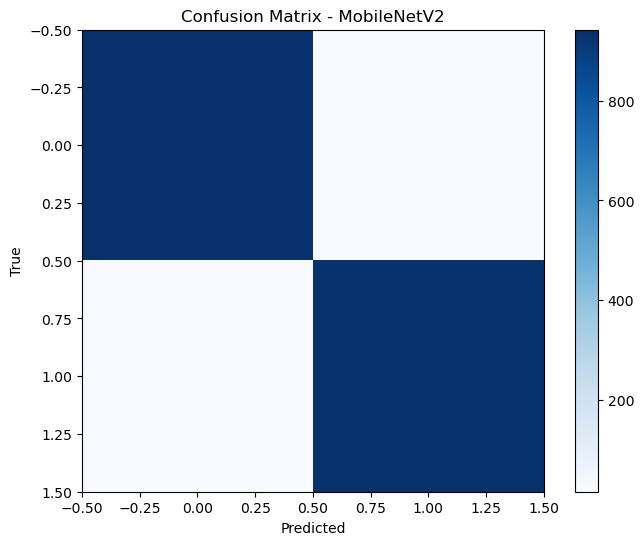


Evaluating Custom CNN...
28/60 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9018 - loss: 0.2244

D:\Anacondaa\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 45s 754ms/step - accuracy: 0.9219 - loss: 0.1819
Test Accuracy: 0.9355
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 733ms/step
F1 Score: 0.9355
Precision: 0.9367
Recall: 0.9355

Classification Report:
              precision    recall  f1-score   support

   with_mask       0.91      0.96      0.94       958
without_mask       0.96      0.91      0.93       950

    accuracy                           0.94      1908
   macro avg       0.94      0.94      0.94      1908
weighted avg       0.94      0.94      0.94      1908



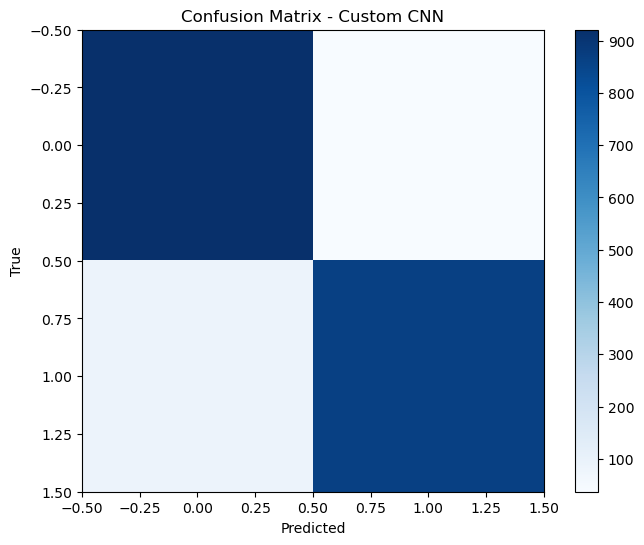

In [8]:
# Evaluate both models
evaluate_model(mobilenet_model, "MobileNetV2")
evaluate_model(cnn_model, "Custom CNN")


In [35]:
import cv2
import numpy as np

def realtime_detection(model, model_name="Model", input_size=(224, 224), class_names=["With Mask", "Without Mask"]):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    print(f"\n[INFO] Starting Real-Time Detection using {model_name}... Press 'q' to quit.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to read frame.")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(60, 60))

        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]
            face = cv2.resize(face, input_size)
            face = face / 255.0
            face = np.expand_dims(face, axis=0)

            prediction = model.predict(face, verbose=0)

            if model.output_shape[-1] == 2:  # Categorical
                label = np.argmax(prediction)
            else:  # Binary
                label = int(prediction[0][0] > 0.5)

            color = (0, 255, 0) if label == 0 else (0, 0, 255)
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(frame, class_names[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

        cv2.imshow(f"{model_name} - Face Mask Detection", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
# For MobileNetV2
realtime_detection(mobilenet_model, "MobileNetV2", input_size=(224, 224))

# For Custom CNN (if it was trained on 128x128)
# realtime_detection(cnn_model, "Custom CNN", input_size=(128, 128))



[INFO] Starting Real-Time Detection using MobileNetV2... Press 'q' to quit.
